<a href="https://colab.research.google.com/github/GuillermoSainz07/Notebooks-DS/blob/main/Modelo_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo ARIMA

El modelo arima es un modelo que depende de varios hiperparametros $ARIMA(p,d,q)$

Como elegimos los hiperparametros? Para la seleccion de los hiperparametros nos seran de ayuda:
- ACF (autocorrelacion) para el hiperparametro de $MA(q)$
- PACF (autocorrelacion parcial) para el hiperparametro $AR(p)$

Sin embargo antes de usar estas herramientas, debemos mencionar que ACF y PACF solo se pueden usar en una serie de tiempo **estacionaria**

La transformaciones mas comunes para hacer estacionaria una serie de tiempo son:
- Logartimo natural: Al aplicar el logaritmo natural, regularmente se consigue que la serie temporal sea estacionaria con respecto a la *varianza*
- Diferenciacion: Diferenciar una serie temporal, normalmente conseguimos eliminar la tendencia y hacer que la serie temporal sea estacionaria con respecto a su *media*. Por lo general, se comienza con diferenciacion de orden 1 y retraso 1. Luego si los datos aun no son estacionarios, intente diferenciar con respecto al retrado estacional (por ejemplo, 12 si tenemos datos mensuales)

In [ ]:
!pip install yfinance

In [ ]:
!pip install pmdarima

In [ ]:
plt.style.use('seaborn')

<ipython-input-76-4a43041a1d49>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
import pmdarima as pm
from sklearn.metrics import mean_squared_error

In [ ]:
df = yf.download('AAPL',
                 start='2015-01-01',
                 end='2021-12-31',
                 interval='1mo',
                 progress=False).Close

In [ ]:
df = pd.DataFrame(data=df.values, columns=['AAPL'], index=df.index)

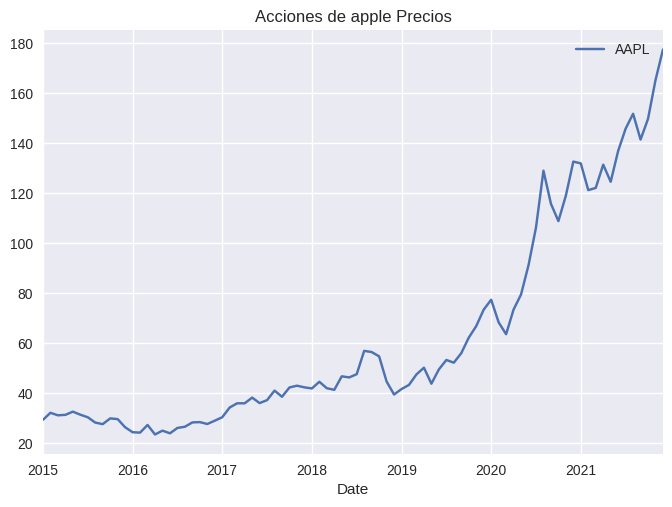

In [ ]:
df.plot(title='Acciones de apple Precios')
plt.show()

Analizar si la serie es estacionaria

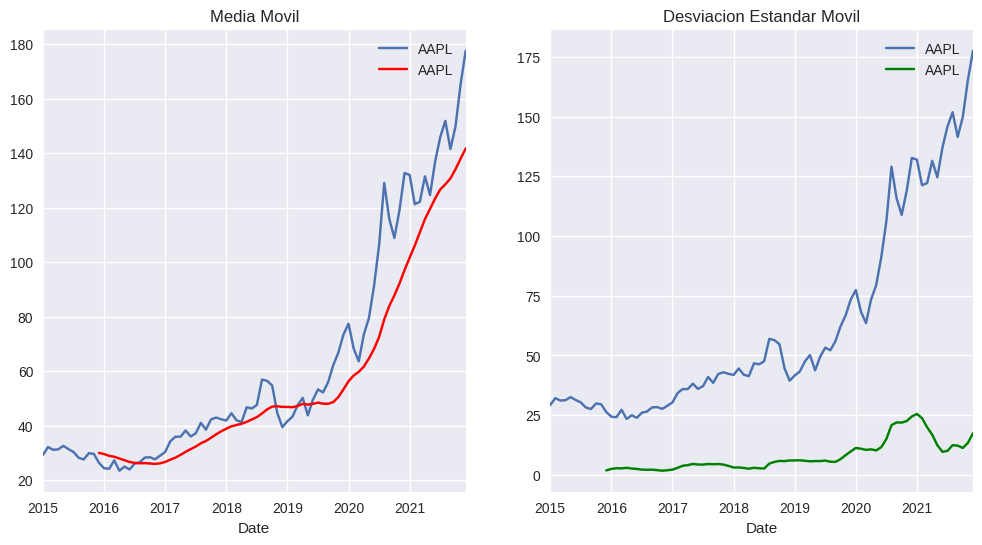

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
df.plot(ax=ax[0])
df.rolling(window=12).mean().plot(ax=ax[0], title='Media Movil',color='red', label='MA')

df.plot(ax=ax[1])
df.rolling(window=12).std().plot(ax=ax[1], title='Desviacion Estandar Movil', color='green', label='MS')

plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict

In [ ]:
# Contraste de Dickey-Fuller
ADF = adfuller(df)
print(f'Estadistico ADF: {ADF[0]:.3f}',
      f'Valor P: {ADF[1]:.3f}')

Estadistico ADF: 2.605 Valor P: 0.999


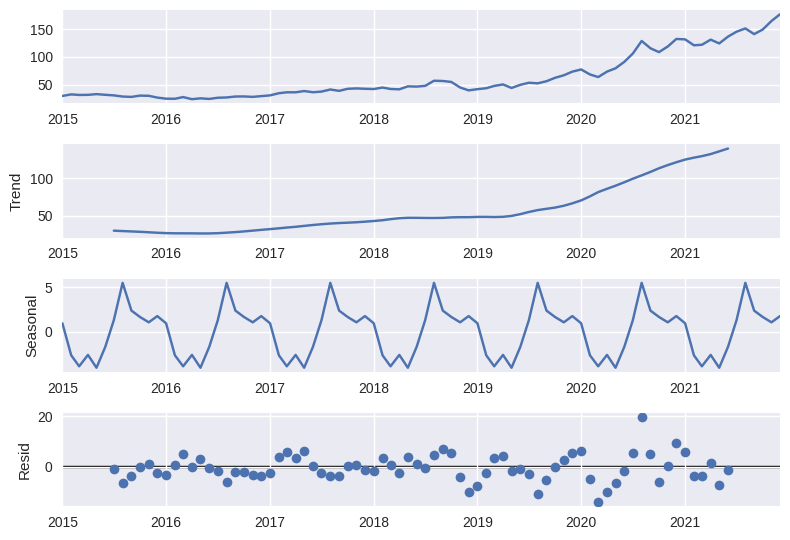

In [ ]:
_ = seasonal_decompose(df, period=12).plot()

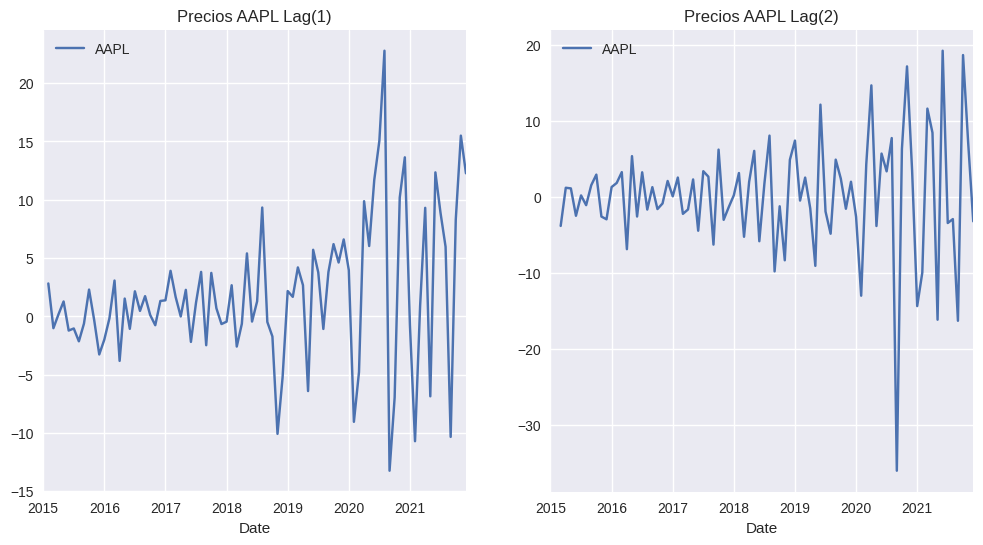

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
df.diff().plot(ax=ax[0], title='Precios AAPL Lag(1)')
df.diff().diff().plot(ax=ax[1], title='Precios AAPL Lag(2)')
plt.show()

In [ ]:
# Contraste de Dickey-Fuller 2
ADF_2 = adfuller(df.diff().dropna())
print(f'Estadistico ADF: {ADF_2[0]:.3f}',
      f'Valor P: {ADF_2[1]:.3f}')

Estadistico ADF: -7.326 Valor P: 0.000


In [ ]:
df_s = df.diff().dropna()

## Construccion del modelo ARIMA(p,d,q)


In [ ]:
## Train Test Split

train_size = int(len(df)*0.80)

x_train = df[:train_size]
x_test = df[train_size:]

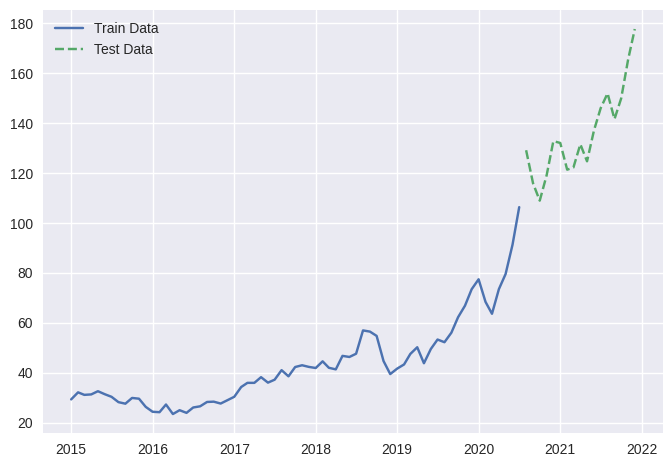

In [ ]:
plt.plot(x_train)
plt.plot(x_test, ls='--')
plt.legend(['Train Data','Test Data'])
plt.show()

## Eligiendo parametro AR(p)

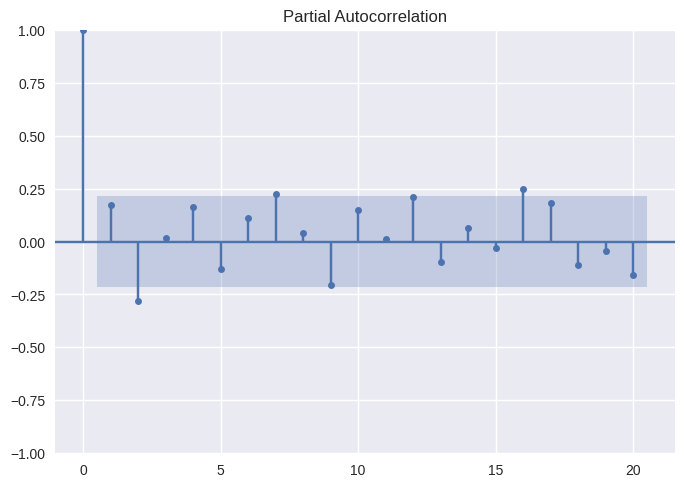

In [ ]:
_ = plot_pacf(df_s)

## Eligiendo parametro MA(q)

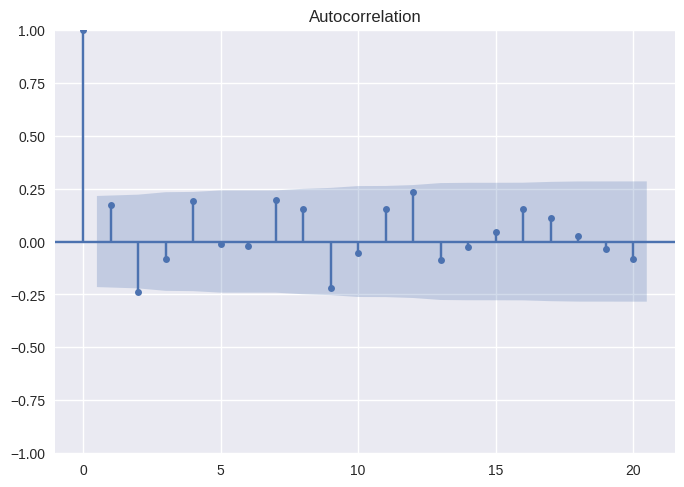

In [ ]:
_ = plot_acf(df_s)

## Modelo ARIMA

In [ ]:
modelo =  ARIMA(x_train, order=(9,1,9))
modelo_fit = modelo.fit()
modelo_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   AAPL   No. Observations:                   67
Model:                 ARIMA(9, 1, 9)   Log Likelihood                -170.389
Date:                Wed, 21 Jun 2023   AIC                            378.778
Time:                        00:11:03   BIC                            420.381
Sample:                    01-01-2015   HQIC                           395.217
                         - 07-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5488      0.501      1.095      0.273      -0.433       1.531
ar.L2         -0.7229      0.432     -1.675      0.094      -1.569       0.123
ar.L3          0.4043      0.542      0.747      0.455      -0.657       1.466
ar.L4         -0.1706      0.456     -0.374      0.708      -1.064       0.723
ar.L5         -0.0912      0.442     -0.206      0.837      -0.958       0.776
ar.L6          0.1614      0.425      0.380      0.704      -0.671       0.994
ar.L7          0.2606      0.415      0.628      0.530      -0.553       1.075
ar.L8          0.0867      0.295      0.294      0.769      -0.492       0.665
ar.L9          0.4189      0.445      0.941      0.347      -0.454       1.292
ma.L1         -0.1836     23.563     -0.008      0.994     -46.366      45.998
ma.L2          0.5908     22.537      0.026      0.979     -43.582      44.763
ma.L3         -0.0036     28.188     -0.000      1.000     -55.251      55.244
ma.L4         -0.3123     15.234     -0.020      0.984     -30.169      29.545
ma.L5          0.4994      7.275      0.069      0.945     -13.760      14.759
ma.L6          0.2618     33.011      0.008      0.994     -64.438      64.961
ma.L7         -0.4269     35.059     -0.012      0.990     -69.142      68.288
ma.L8          0.3614     29.624      0.012      0.990     -57.701      58.424
ma.L9         -0.8544     22.472     -0.038      0.970     -44.898      43.190
sigma2         8.2727    215.837      0.038      0.969    -414.760     431.305
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                23.39
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               3.04   Skew:                            -0.74
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

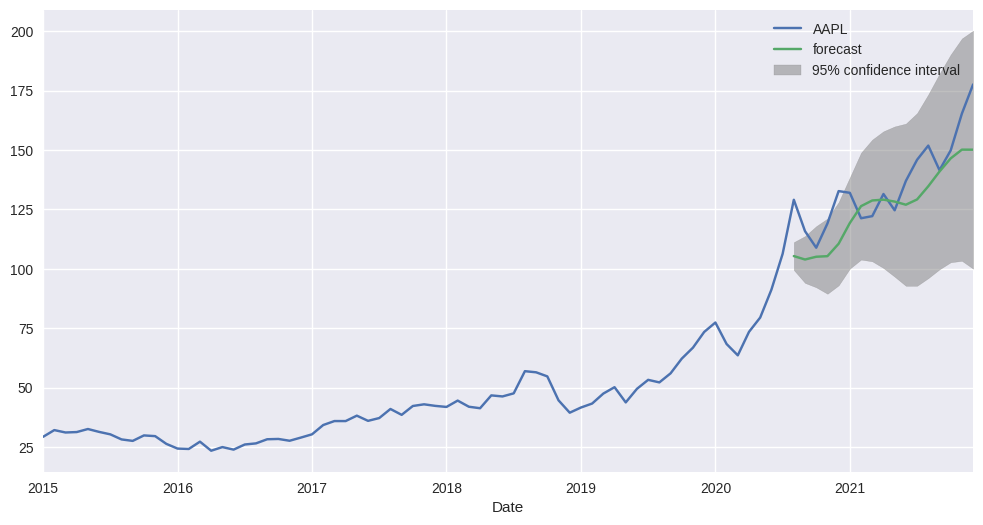

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(12,6))
df.plot(ax=axes)
_ =plot_predict(modelo_fit, start=len(x_train),
                         end=(len(df)-1),
                        ax=axes)

In [ ]:
arima_predicciones = modelo_fit.predict(start=len(x_train),
                                       end=(len(df)-1))

In [ ]:
errores_m1 = mean_squared_error(x_test, arima_predicciones)

In [ ]:
errores_m1

194.98111350218718

# Grid Search Parametros ARIMA


In [ ]:
import itertools

In [ ]:
p = range(0,10)
q = range(0,10)
d = range(0,3)
pdq = list(itertools.product(p,d,q))
# AIC
arima_resultados = []
# MSE
mse = []

In [ ]:
for param_set in pdq:
  try:
    model = ARIMA(x_train, order=param_set)
    model_fit = model.fit()
    arima_resultados.append(model_fit.aic)
    prediccion = model_fit.predict(start=len(x_train),
                                   end=(len(df)-1))
    mse.append(mean_squared_error(x_test, prediccion))
  except:
    continue

menor_mse = np.argmin(mse)
menor_aic = np.argmin(arima_resultados)
conjunto_optimo_aic = pdq[menor_aic]
conjunto_optimo_mse = mse[menor_mse]

In [ ]:
conjunto_optimo_mse = pdq[menor_mse]

In [ ]:
print('='*30)
print(f'El conjunto de parametros con el menor AIC: {conjunto_optimo_aic}')
print(f'El conjunto de parametros con el menor MSE: {conjunto_optimo_mse}')

El conjunto de parametros con el menor AIC: (1, 2, 6)
El conjunto de parametros con el menor MSE: (7, 2, 7)


In [ ]:
modelo2 = ARIMA(x_train, order=(1,2,6))
modelo2_fit = modelo2.fit()
modelo2_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   AAPL   No. Observations:                   67
Model:                 ARIMA(1, 2, 6)   Log Likelihood                -172.707
Date:                Tue, 20 Jun 2023   AIC                            361.414
Time:                        23:54:35   BIC                            378.809
Sample:                    01-01-2015   HQIC                           368.278
                         - 07-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4853      0.189     -2.566      0.010      -0.856      -0.115
ma.L1         -0.1358     65.639     -0.002      0.998    -128.786     128.514
ma.L2         -0.6175     40.180     -0.015      0.988     -79.370      78.135
ma.L3         -0.0149      0.358     -0.042      0.967      -0.717       0.687
ma.L4         -0.5927      8.218     -0.072      0.943     -16.699      15.514
ma.L5         -0.1346     59.286     -0.002      0.998    -116.333     116.064
ma.L6          0.9898     53.380      0.019      0.985    -103.632     105.612
sigma2         9.4194    508.392      0.019      0.985    -987.010    1005.849
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.35
Prob(Q):                              0.84   Prob(JB):                         0.51
Heteroskedasticity (H):               2.37   Skew:                            -0.20
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

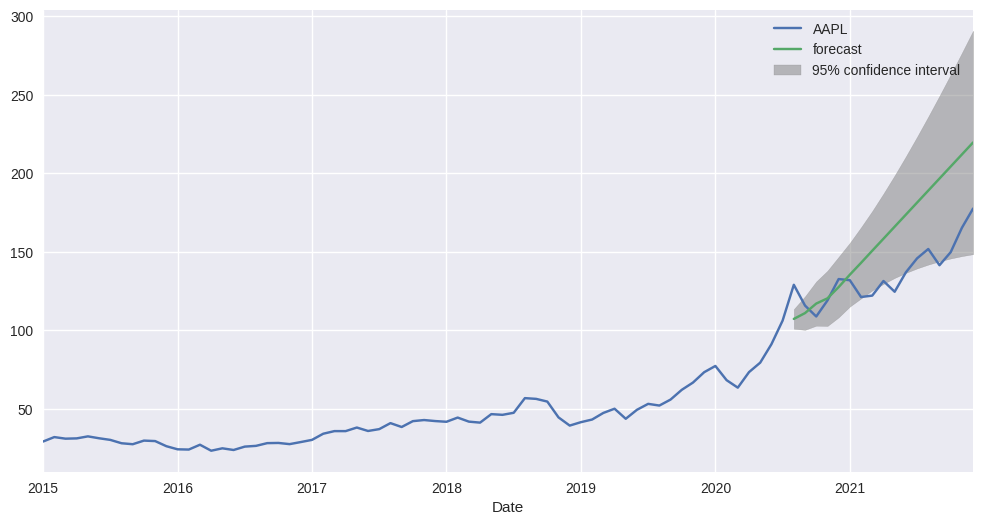

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(12,6))
df.plot(ax=axes)
_ =plot_predict(modelo2_fit, start=len(x_train),
                         end=(len(df)-1),
                        ax=axes)

In [ ]:
arima_predicciones_m2 = modelo2_fit.predict(start=len(x_train),
                                            end=(len(df)-1))
errores_m2 = mean_squared_error(x_test, arima_predicciones_m2)
errores_m2

1075.4602927474396

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



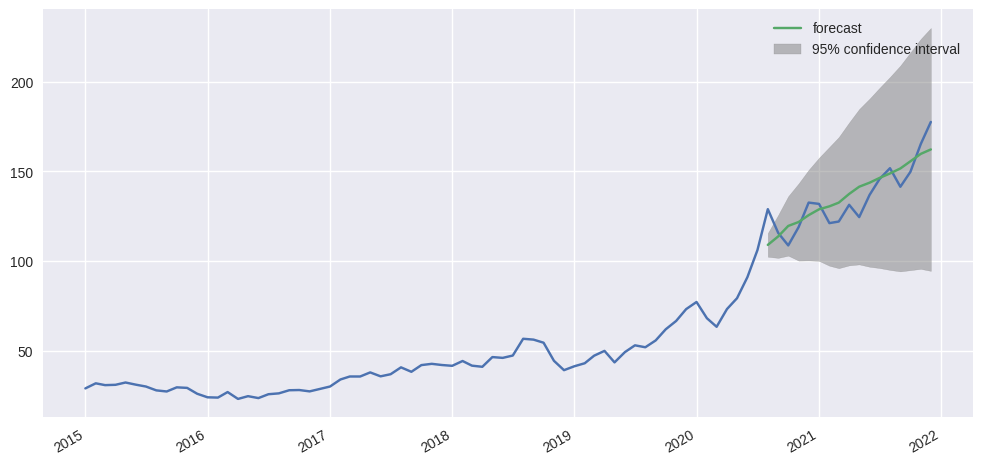

In [ ]:
modelo3 = ARIMA(x_train, order=(7,2,7))
modelo3_fit = modelo3.fit()

fig, ax = plt.subplots(1,1, figsize=(12,6))
plt.plot(df)
_= plot_predict(modelo3_fit, start=len(x_train), end=(len(df)-1),ax=ax)

## Auto-ARIMA

In [ ]:
auto_arima = pm.auto_arima(x_train, seasonal=False, stepwise=False)
auto_arima

ARIMA(order=(4, 1, 0), scoring_args={}, suppress_warnings=True)